# Project: Investigate a Dataset - [TMDB DATASET]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this section of the report, We will analyze the TMDB moie data set. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis
1st Question: "What genres have higher rating, revenue & are more popular?"
Is there a big gap between different genres? Does it have a strong impact on the mentioned data?

For the 2nd Question: "What properties have an impact on a movie revenue?"
Does the movie have higher revenues just because more money was spent on it? or is it genre-dependent? or are there any other factors affecting it?

For the 3rd Question: "How did movies change through time??"
Analyzing the avaliability of movies & what do people think about it.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0 
#commented the upgrade because it stops some functionality in the code

In [3]:
#Reading the csv file 
#And taking a look at the first 5 rows of the data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

In this step, Get the data clean, tidy & ready to be analyzed, to draw conclusive findings from it.

-First: Check the columns of data & their type

In [4]:
#Knowing the columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning

-Second: Start by removing unnecessary columns from the data to make the analysis easier 

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#Removing unwanted columns 
df.drop(['id', 'imdb_id','homepage','tagline','overview',], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


-Third: Get a feel of the avaliable statistics to determine what relations could be concluded from them

In [6]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


-forth: determine the vareity of each data

In [7]:
df.nunique()

popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
director                 5067
keywords                 8804
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

-fifth: extra cleaning of data 
    the genres, production companies & keywords appear to have a limited entries that are common between movies.
    However the code cannot determine them if they are grouped together.
    Therefor we need a way to split them while maintaining their relation with other data

In [8]:
def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [9]:
#spliting the genre column and saving it to a diiferent DataFrame to avoid messy data
df0 = tidy_split(df, 'genres', sep='|')
#checking to see that it now has a suitable number of different data that could be used to do analysis
df0['genres'].nunique()

20

In [10]:
#spliting the production companies column and saving it to a diiferent DataFrame to avoid messy data
df1 = tidy_split(df, 'production_companies', sep='|')
#checking to see that it now has a suitable number of different data that could be used to do analysis
df1['production_companies'].nunique()

7879

In [11]:
#spliting the keywords column and saving it to a diiferent DataFrame to avoid messy data
df2 = tidy_split(df, 'keywords', sep='|')
#checking to see that it now has a suitable number of different data that could be used to do analysis
df2['keywords'].nunique()

7878

In [12]:
#spliting the cast column and saving it to a diiferent DataFrame to avoid messy data
df3 = tidy_split(df, 'cast', sep='|')
#checking to see that it now has a suitable number of different data that could be used to do analysis
df3['cast'].nunique()

19026

In [13]:
#spliting the cast column and saving it to a diiferent DataFrame to avoid messy data
df4 = tidy_split(df, 'director', sep='|')
#checking to see that it now has a suitable number of different data that could be used to do analysis
df4['director'].nunique()

5362

We find from the above cells that the only suitable number of data to work with is the genre data but the director, cast, production companies & keywords have a large vareity of data that would make it hard to work with.

<a id='eda'></a>
## Exploratory Data Analysis

Now that the data is trimmed and cleaned, we are ready to move on to exploration. By Computing statistics and creating visualizations with the goal of addressing the research questions that were posed in the Introduction section. 


### Research Question 1 (What genres have higher rating, revenue & are more popular?)

genres
Action             7.276462e+07
Adventure          1.131379e+08
Animation          7.525606e+07
Comedy             3.752624e+07
Crime              4.233811e+07
Documentary        2.041107e+06
Drama              2.922632e+07
Family             7.243318e+07
Fantasy            9.631366e+07
Foreign            1.520460e+06
History            3.201179e+07
Horror             1.682281e+07
Music              2.857177e+07
Mystery            4.021757e+07
Romance            3.569197e+07
Science Fiction    7.008432e+07
TV Movie           2.514970e+05
Thriller           4.171440e+07
War                4.760518e+07
Western            2.856871e+07
Name: revenue, dtype: float64


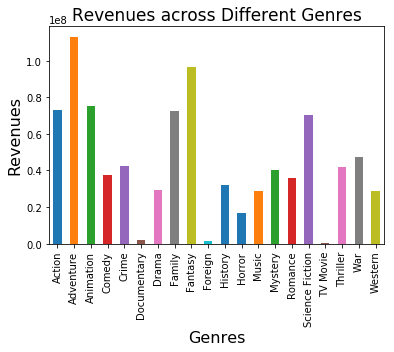

In [14]:
#Exploring genre vs revenue through bar diagram
m0=df0.groupby('genres').revenue.mean()
print(m0)
m0.plot.bar();
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Revenues', fontsize=16)
plt.title('Revenues across Different Genres',fontsize=17);

We find the top 2 genres in Revenues are in order are (Adventure, Fantasy) and then we almost have a tie between (Action, Animation, Family, Science Fiction); Meanwhile the least genres in Revenues are (TV Movies, Foregin, Documentary).

genres
Action             0.926136
Adventure          1.154259
Animation          0.852182
Comedy             0.592607
Crime              0.744821
Documentary        0.181432
Drama              0.591496
Family             0.786668
Fantasy            0.992840
Foreign            0.191496
History            0.575936
Horror             0.465357
Music              0.487321
Mystery            0.690012
Romance            0.592082
Science Fiction    1.001218
TV Movie           0.270896
Thriller           0.741513
War                0.727683
Western            0.590615
Name: popularity, dtype: float64


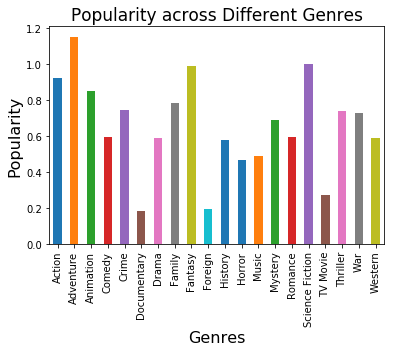

In [15]:
#Exploring genre vs revenue through bar diagram
m1=df0.groupby('genres').popularity.mean()
print(m1)
m1.plot.bar();
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Popularity', fontsize=16)
plt.title('Popularity across Different Genres',fontsize=17);

We find in popularity the same genres that have high revenues are the popular ones (Adventure, Fantasy, Sci-fi), and the ones with low revenues are the least popular (TV Movies, Foregin, Documentary). Therefore popularity have an impact on revenues.

genres
Action             5.787421
Adventure          5.940585
Animation          6.403147
Comedy             5.905167
Crime              6.124059
Documentary        6.908462
Drama              6.165301
Family             5.997563
Fantasy            5.863537
Foreign            5.981383
History            6.410479
Horror             5.337447
Music              6.480392
Mystery            5.946790
Romance            6.042874
Science Fiction    5.665041
TV Movie           5.788024
Thriller           5.750413
War                6.297778
Western            6.083030
Name: vote_average, dtype: float64


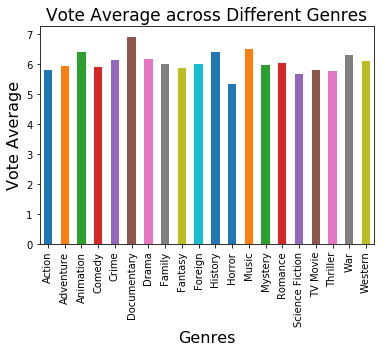

In [16]:
#Exploring genre vs revenue through bar diagram
m2=df0.groupby('genres').vote_average.mean()
print(m2)
m2.plot.bar();
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Vote Average', fontsize=16)
plt.title('Vote Average across Different Genres',fontsize=17);

In average vote, the numbers vary by little bits, we find that the documentary genre have the highest rating & horror has the least rating.

### Research Question 2 (What properties have an impact on a movie revenue?)

Text(0.5,0,'Budget')

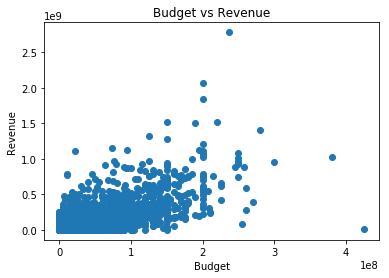

In [17]:
#Exploring the effect of the budget
y = df['revenue']
x = df['budget']

plt.scatter(x,y)
plt.title('Budget vs Revenue')
plt.ylabel('Revenue', fontsize=10)
plt.xlabel('Budget',fontsize=10)

Although not very clear & defined but We find a positive corelation between budget & revenue

Text(0.5,0,'runtime')

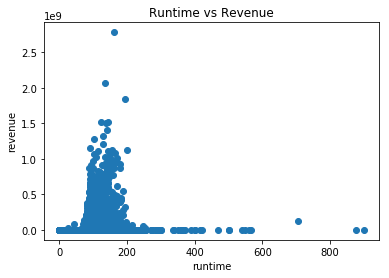

In [18]:
#Exploring the effect of runtime
y = df['revenue']
x = df['runtime']

plt.scatter(x,y)
plt.title('Runtime vs Revenue')
plt.ylabel('revenue', fontsize=10)
plt.xlabel('runtime',fontsize=10)

We find that, there is a 'sweet spot' for runtime -between 50:200- and a part from it, the revenues seems to do so much worse.

Text(0.5,0,'Average Vote')

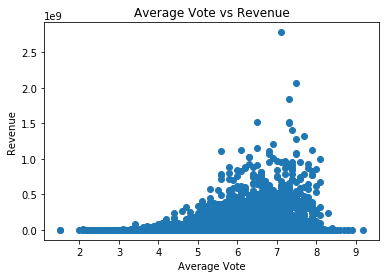

In [19]:
#Exploring the Average vote impact
y = df['revenue']
x = df['vote_average']

plt.scatter(x,y)
plt.title('Average Vote vs Revenue')
plt.ylabel('Revenue', fontsize=10)
plt.xlabel('Average Vote',fontsize=10)

We find the distribution skewed to the left but not to the extreme left as would be expected; that higher average vote would lead to higher revenues.

Text(0.5,0,'popularity')

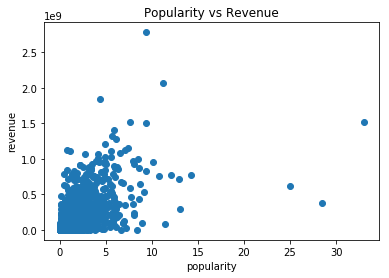

In [20]:
#Exploring the Popularity vote impact
y = df['revenue']
x = df['popularity']

plt.scatter(x,y)
plt.title('Popularity vs Revenue')
plt.ylabel('revenue', fontsize=10)
plt.xlabel('popularity',fontsize=10)

ALthough not precise, We find a positive corelation between popularity & revenue.

Text(0,0.5,'No. of Movies')

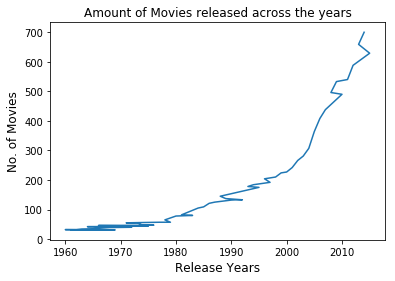

In [21]:
#Exploring the amount of movies released each year
df['release_year'].value_counts().plot();
plt.title('Amount of Movies released across the years')
plt.xlabel('Release Years', fontsize=12)
plt.ylabel('No. of Movies',fontsize=12)

We find that the amounts of movies released each year increased almost exponentially from 1966 till 2015.

Text(0,0.5,'Popularity')

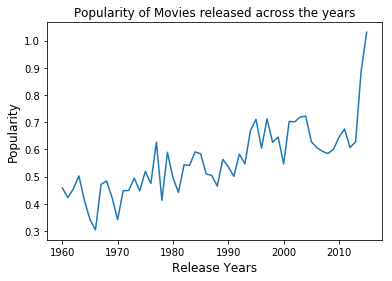

In [22]:
#Exploring the popularity of movies across the years
df.groupby('release_year').popularity.mean().plot()
plt.title('Popularity of Movies released across the years')
plt.xlabel('Release Years', fontsize=12)
plt.ylabel('Popularity',fontsize=12)

And although there is a lot of fluctuations but the popularity of movies seem to be increasing at the same pace.

Text(0,0.5,'Average Vote')

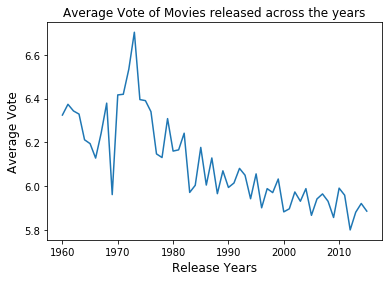

In [23]:
#Exploring the average vote of movies across the years
df.groupby('release_year').vote_average.mean().plot()
plt.title('Average Vote of Movies released across the years')
plt.xlabel('Release Years', fontsize=12)
plt.ylabel('Average Vote',fontsize=12)

Meanwhile it seems people are less satisfied or maybe less amazed by movies than before by analyzing the average vote.

Text(0,0.5,'Revenues')

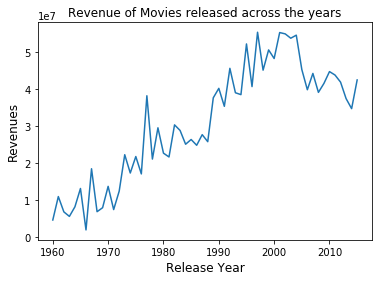

In [24]:
#Exploring the average revenue of movies across the years
df.groupby('release_year').revenue.mean().plot()
plt.title('Revenue of Movies released across the years')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Revenues',fontsize=12)

And we find a high increase in revenues across the years that could be due to inflation, the amount of movies released & avaliability. But then it started to drop back after 2000.

Text(0,0.5,'Runtime')

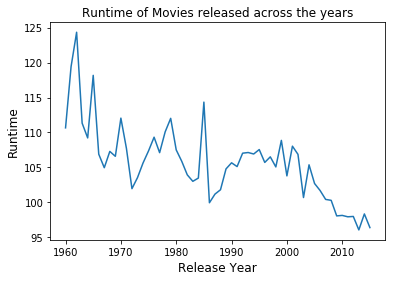

In [27]:
#Exploring the average runtime of movies across the years
df.groupby('release_year').runtime.mean().plot()
plt.title('Runtime of Movies released across the years')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Runtime',fontsize=12)

Although there are huge fluctuation but runtime decreases by a lot from 1960s till now.

<a id='conclusions'></a>
## Conclusions
For the 1st Question: "What genres have higher rating, revenue & are more popular?"
1. The top genres in Revenues (Adventure, Fantasy, Action, Animation, Family, Science Fiction) are ones that are worth watching in the cinema with their new CGI and top stars; Meanwhile the least genres in Revenues are explanatory since Documentary are made mostly for educational purpose and tv movies are made, well, for TV and finally foregin movies which could be due to people hating to read subtitles.
2. We find in popularity the same genres that have high revenues are the popular ones  and the ones with low revenues are the least popular which supports our first conclusion. And also draws another conclusion, that popularity have an impact on revenues.
3. Contradictory to the above conclusions, Documentary genre holds the top position in average vote.

For the 2nd Question: "What properties have an impact on a movie revenue?"
1. We find a positive corelation between budget & revenue
2. We can conclude that greatly decreasing or increasing the runtime of the movie would actually fair worse for the revenues.
3. Contradictory to expectations, not the highest average vote movies that have the highest revenue actually it is cl.
4. We find a positive corelation between popularity & revenue.

For the 3rd Question: "How did movies change through time??"
1. We find that the amounts of movies released each year increased almost exponentially from 1966:2015.
2. And although there is a lot of fluctuations but the popularity of movies seem to be increasing at the same pace.
3. Meanwhile it seems people are less satisfied or maybe less amazed by movies than before by analyzing the average vote.
4. And we find a high increase in revenues across the years that could be due to inflation, the amount of movies released & avaliability.

### Limitations
1. Datas like cast, keywords, directors & production companies have hugely varied data that it would be hard to analyze all of them.
2. Not all factors affecting movies popularity & revenues are mentioned in the list.


In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0